# Hierarchical Clustering

This chapter focuses on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? The chapter concludes with a discussion on the limitations of hierarchical clustering and discusses considerations while using hierarchical clustering.

### Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention
held in major cities in the world. You have the data of last year's football
the number of people at the convention ground at a given time. 
You would like to decide the location of your stall to maximize sales. 
Using the ward method, apply hierarchical clustering to find the two points  of attraction in the area.

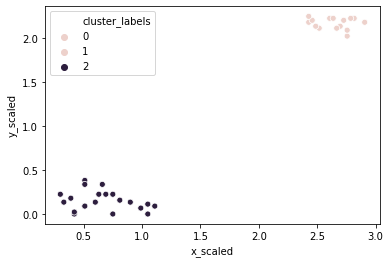

In [5]:
## Basics of hierarchical clustering

# creating a distance matrix using linkage

# scipy.cluster.hierarchy.linkage(obs, method = 'single', metric = 'single',
# metric = 'euclidean', optimal_ordering = False)

#  which method use ?
# single, complete, average, centroid, median, ward
# No one right method for all!

import pandas as pd
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage
from matplotlib import pyplot as plt
import seaborn as sns

# load data
comic_con = pd.read_csv('comic_con.csv')

# normalize data 
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', 
                data = comic_con)
plt.show()


### Hierarchical clustering: single method
Let us use the same footfall dataset and check if any changes
are seen if we use a different method for clustering.

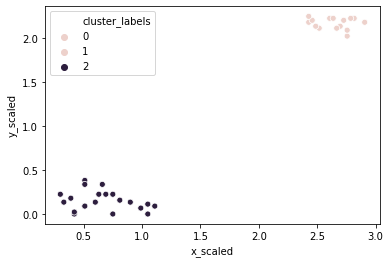

In [6]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', 
                data = comic_con)
plt.show()

# Notice that in this example, the clusters formed are not different 
# from the ones created using the ward method.

### Hierarchical clustering: complete method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

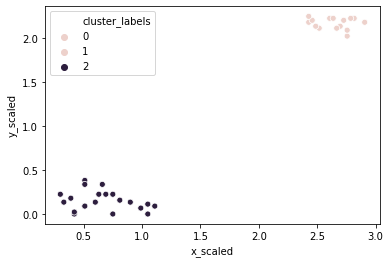

In [7]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', 
                data = comic_con)
plt.show()

# Coincidentally, the clusters formed are not different 
# from the ward or single methods. Next, let us learn how to visualize clusters.

### Visualize clusters with matplotlib
We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

In [ ]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', y='y_scaled',
                       c=comic_con['cluster_labels'].apply(lambda x: colors[x]))

plt.title('visualize with matplotlib')
plt.show()

### Visualize clusters with seaborn
Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

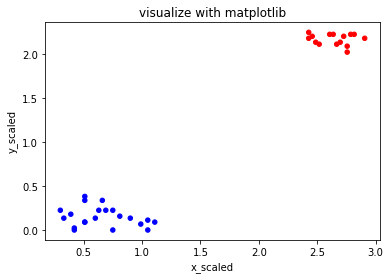

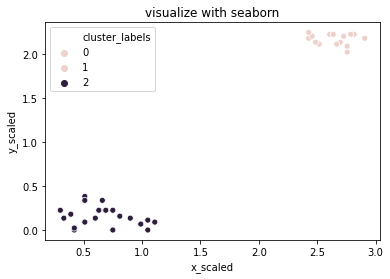

In [16]:
# Plot a scatter plot using seaborn
ax = sns.scatterplot(x= 'x_scaled', 
                y='y_scaled', 
                hue = 'cluster_labels', 
                data = comic_con)

ax.set_title('visualize with seaborn')
plt.show()

### Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

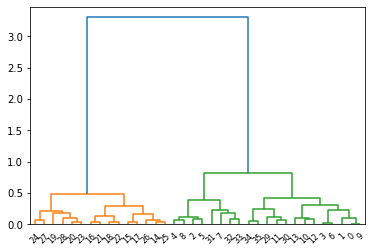

In [17]:
## How many clusters?

# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram


# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

# Given the dendrogram below, how many clusters can you see in the data?
# Notice that the top two clusters are farthest away from each other. So two clusters is appropriate

### Timing run of hierarchical clustering

Remember that you can time the execution of small code snippets with:

%timeit sum([1, 3, 2])

How long does it take to the run the linkage function on the comic con data?

In [21]:
## Limitations of hierarchical clustering

# exponential time growth as data size increase

# lets see the efficiency of the code, we need timeit

import random, timeit

points = 100
df = pd.DataFrame({'x': random.sample(range(0,points),points), 
                   'y': random.sample(range(0,points),points)})
%timeit linkage(df[['x', 'y']], method = 'ward', metric = 'euclidean')

608 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

1. sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles

2. aggression: a number between 0-99 which signifies the commitment and will of a player

These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


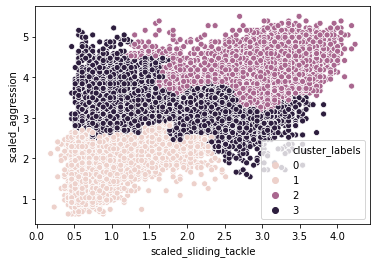

In [48]:
# This data consists of 18000 rows, and is considerably larger than earlier datasets.

# load data
fifa18 = pd.read_csv('fifa_18_dataset.csv')

# normalize data 
fifa18['scaled_sliding_tackle'] = whiten(fifa18['sliding_tackle'])
fifa18['scaled_aggression']     = whiten(fifa18['aggression'])

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa18[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa18['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa18[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue= 'cluster_labels', data=fifa18)
plt.show()

# Notice how long it took to run hierarchical clustering on a few thousand data points. 
# In the next chapter, you will explore clusters in data through k-means clustering.
